In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape


In [4]:
# Set image dimensions
IMG_SIZE = 64

# Define directories
train_dir = r"C:\HAL\LSTM_ISL\train"
classes = sorted(os.listdir(train_dir))  # Extract labels from folder names

In [5]:
# Load images
def load_images(data_dir):
    images, labels = [], []
    for label in classes:
        path = os.path.join(data_dir, label)
        for img_name in os.listdir(path):
            img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(classes.index(label))  # Numeric encoding of labels
    return np.array(images), np.array(labels)

# Load data
X_train, y_train = load_images(train_dir)

In [6]:
# Normalize
X_train = X_train / 255.0
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(classes))


In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Reshape((1, -1)),  # Reshape to feed into LSTM
    LSTM(64, return_sequences=False),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Infosys Springboard\IP\my_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 12544)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │     3,227,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 35)             │         2,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,248,995 (12.39 MB)

 Trainable params: 3,248,995 (12.39 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9190 - loss: 0.4270 - val_accuracy: 0.0083 - val_loss: 6.3227
Epoch 2/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.9842 - loss: 0.0339 - val_accuracy: 0.0083 - val_loss: 7.3980
Epoch 3/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9885 - loss: 0.0250 - val_accuracy: 0.0083 - val_loss: 7.2875
Epoch 4/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9996 - loss: 0.0021 - val_accuracy: 0.0083 - val_loss: 7.4813
Epoch 5/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 1.0000 - loss: 3.2738e-04 - val_accuracy: 0.0083 - val_loss: 7.6952
Epoch 6/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 1.0000 - loss: 2.0427e-04 - val_accuracy: 0.0083 - val_loss: 7.8347
Epoch 7/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 1.0000 - loss: 1.3478e-04 - val_accuracy: 0.0083 - val_loss: 8.0641
Epoch 8/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 1.0000 - los

In [10]:
test_loss, test_accuracy = model.evaluate(X_train, y_train)
print(f"Test Accuracy: {test_accuracy:.4f}")


1118/1118 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9785 - loss: 0.1862
Test Accuracy: 0.8017


In [12]:
y_pred = model.predict(X_train)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_train, axis=1)  # If y_test is one-hot encoded

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")


1118/1118 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
Accuracy: 0.8017


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))


              precision    recall  f1-score   support

           0       0.70      1.00      0.82      1000
           1       0.67      1.00      0.81      1000
           2       1.00      1.00      1.00      1000
           3       0.80      1.00      0.89      1000
           4       1.00      1.00      1.00      1000
           5       0.82      1.00      0.90      1000
           6       1.00      1.00      1.00      1000
           7       1.00      1.00      1.00      1000
           8       0.99      1.00      1.00      1000
           9       0.57      1.00      0.72      1000
          10       0.78      1.00      0.88      1000
          11       0.37      1.00      0.54      1247
          12       0.91      1.00      0.96      1000
          13       1.00      1.00      1.00      1000
          14       1.00      1.00      1.00      1000
          15       0.97      1.00      0.99      1000
          16       1.00      1.00      1.00      1000
          17       0.79    

c:\Infosys Springboard\IP\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Infosys Springboard\IP\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Infosys Springboard\IP\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


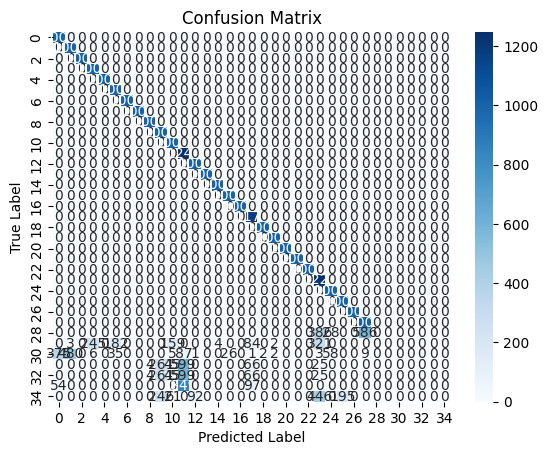

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [15]:
# Save model
model.save("lstm_model.h5")